# HW8

In this homework, we will test PCA in different settings. First, import the Fashion MNIST dataset. (Refer to your HW3).

 

Use sklearn's PCA module to compute the PCs.

1. Plot the curve of explained variance vs number of PCs. 

2. Plots the first 10 PCs as images. What do you see?

3. 
    1. How many PCs do you need to explain 95% of the total variance?
    2. Plot the first 25 original images (use 5 x 5 grid) and the corresponding 25 compressed images (use 5 x 5 grid)

4. 
    1. How many PCs do you need to explain 90% of the total variance?
    2. Plot the first 25 original images (use 5 x 5 grid) and the corresponding 25 compressed images (use 5 x 5 grid)
5. 
    1. How many PCs do you need to explain 75% of the total variance?
    2. Plot the first 25 original images (use 5 x 5 grid) vs the corresponding 25 compressed images (use 5 x 5 grid)



### Setup

I'll do imports and the fetch function as in HW3

In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

np.random.seed(0)

import gzip
import urllib.request

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
IMAGES_PATH = "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz"
LABELS_URL = "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz"
LOCAL_PATH = "data"

# Fetch function from HW3
def fetch_and_read_fashiomnist(images_url=IMAGES_PATH, labels_url=LABELS_URL, local_path=LOCAL_PATH):
    if not os.path.isdir(local_path):
        os.makedirs(local_path)
    labels_path = os.path.join(local_path, "labels.gz")
    images_path = os.path.join(local_path, "images.gz")
    urllib.request.urlretrieve(labels_url, labels_path)
    urllib.request.urlretrieve(images_url, images_path)
    
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

# reading function since I don't want to wait to download every time
def read_fashiomnist(local_path=LOCAL_PATH):
    labels_path = os.path.join(local_path, "labels.gz")
    images_path = os.path.join(local_path, "images.gz")
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels


In [3]:
data, labels= fetch_and_read_fashiomnist()
# data, labels= read_fashiomnist()


Checking it works

In [4]:
print(data.shape)
print(labels.shape)
print(labels[0:3])

(60000, 784)
(60000,)
[9 0 0]


using the ploting function from before too

In [6]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1 

    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

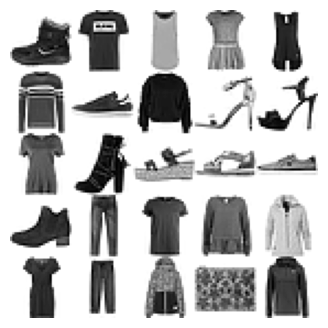

In [7]:
plt.figure(figsize=(4,4))
example_images = data[:25]
plot_digits(example_images, images_per_row=5)
plt.show()

and my dicionary as well

In [10]:
diccionario={
0:  "T-shirt/top",
1:	"Trouser",
2:	"Pullover",
3:	"Dress",
4:	"Coat",
5:	"Sandal",
6:	"Shirt",
7:	"Sneaker",
8:	"Bag",
9:	"Ankle boot",
}

def trans(keys):
    if isinstance(keys,int):
        return diccionario[keys]
    
    return [diccionario[key] for key in keys]

In [11]:
print(labels[0:10])
print(trans(labels[0:10]))

[9 0 0 3 0 2 7 2 5 5]
['Ankle boot', 'T-shirt/top', 'T-shirt/top', 'Dress', 'T-shirt/top', 'Pullover', 'Sneaker', 'Pullover', 'Sandal', 'Sandal']


### 1. Plot the curve of explained variance vs number of PCs. 


first I compute the principal components

In [12]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data)

array([[-1.23993791e+02,  1.63307440e+03, -1.21104119e+03, ...,
         1.01150286e-02,  5.26382395e-02, -5.02000937e-03],
       [ 1.40792885e+03, -4.51641336e+02, -2.61027034e+02, ...,
        -8.79471010e-03,  3.30199846e-02, -1.61369260e-02],
       [-7.25910795e+02, -1.10183814e+03,  1.06154242e+02, ...,
         2.84631329e-03, -1.86294713e-03,  3.40699336e-05],
       ...,
       [ 8.57750196e+02, -1.18024018e+03, -5.20693994e+02, ...,
         7.48279798e-03,  4.77206726e-03,  4.08772823e-04],
       [-8.07476526e+02, -5.81218873e+02,  4.80319909e+02, ...,
         1.78505182e-02,  8.62760426e-03, -8.82580453e-03],
       [-1.81566381e+03, -1.19743343e+02,  4.68913798e+02, ...,
        -9.26107792e-04,  2.71390294e-02, -4.12902898e-04]])

and now we plot the explained variance as a function of the principal components as in class

Text(0, 0.5, 'cumulative variance explained')

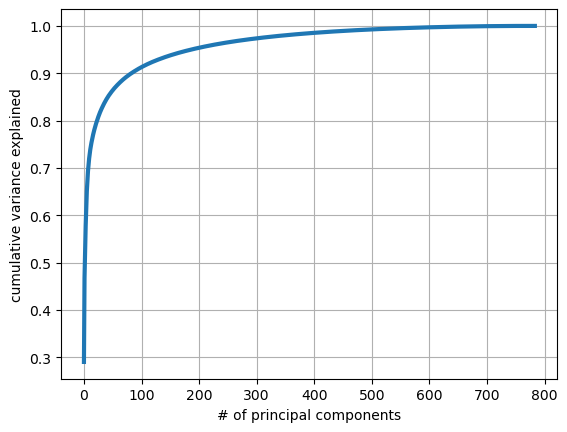

In [15]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum, linewidth=3)
plt.grid(True)
plt.xlabel("# of principal components")
plt.ylabel("cumulative variance explained")

### 2. Plots the first 10 PCs as images. What do you see?

Now let's see how it looks

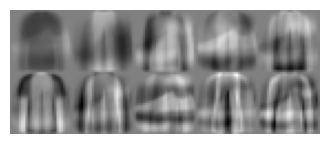

In [16]:
plt.figure(figsize=(4,4))
example_images = pca.components_[:10]
plot_digits(example_images, images_per_row=5)
plt.show()

There's a rough shape of a long sleve shirt with a shoe superposed to some degree in most of them 

### 3.1. How many PCs do you need to explain 95% of the total variance?
We will create two little function to do the remaining problems

In [43]:
def how_many_pcs(percent = 0.95):
    # Fit PCA
    pca = PCA(n_components=percent)
    pca.fit(data)
    n_pcs, pixels = pca.components_.shape

    # plot the explained variance to see it's doing what it should
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(cumsum, linewidth=3, label="explained variance")
    plt.ylim((0,1))
    plt.hlines([percent],[0],[n_pcs], label=f"{percent}% line")
    plt.legend()
    plt.grid(True)
    plt.xlabel("# of principal components")
    plt.ylabel("cumulative variance explained")
    # print the answer
    print(f"The number of components that explain the {percent}% of variance is {n_pcs}")

In [34]:
def project_into_pcs(percent):
    # fit the PCA
    pca = PCA(n_components=percent)
    pca.fit(data)
    # transform it by projecting into the pcs
    transformed_data = pca.transform(data[:25])
    # pull back the projection into the original space
    example_images = pca.inverse_transform(transformed_data)
    example_images.shape
    # plot the first 25
    plt.figure(figsize=(4,4))
    plot_digits(example_images, images_per_row=5)
    plt.show()

We need 187 to explain 95% of the variance

The number of components that explain the 0.95% of variance is 187


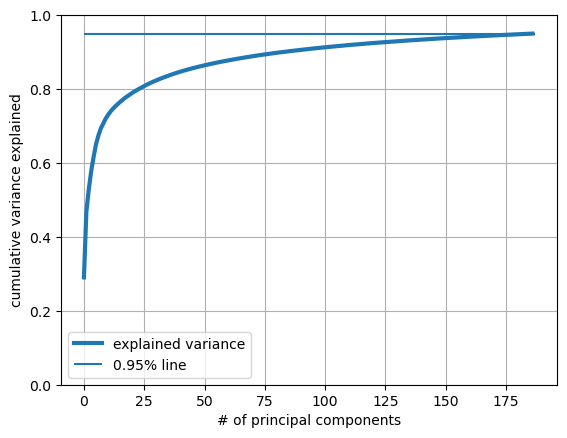

In [44]:
percent = 0.95
how_many_pcs(percent)

### 3.2. Plot the first 25 original images (use 5 x 5 grid) and the corresponding 25 compressed images

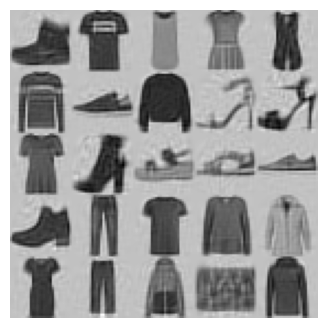

In [45]:
project_into_pcs(percent)

### 4.1 How many PCs do you need to explain 90% of the total variance?

We need 84 to explain 95% of the variance

The number of components that explain the 0.9% of variance is 84


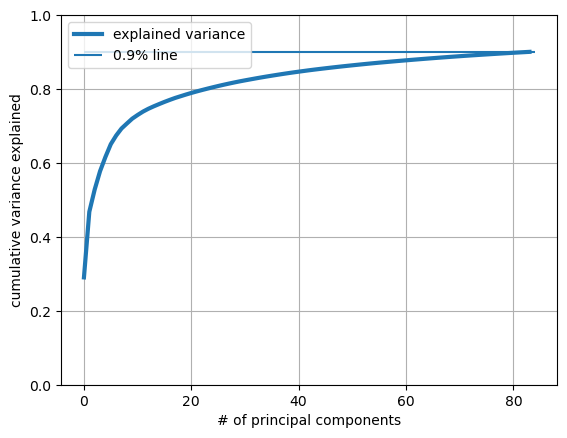

In [46]:
percent = 0.90
how_many_pcs(percent)

### 4.2. Plot the first 25 original images (use 5 x 5 grid) and the corresponding 25 compressed images

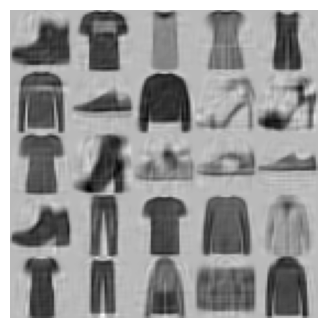

In [47]:
project_into_pcs(percent)

### 5.1 How many PCs do you need to explain 75% of the total variance?

We need 14 to explain 75% of the variance

The number of components that explain the 0.75% of variance is 14


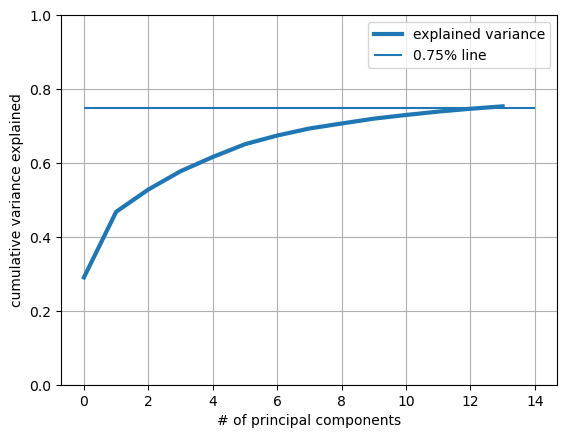

In [48]:
percent = 0.75
how_many_pcs(percent)

### 5.2. Plot the first 25 original images (use 5 x 5 grid) and the corresponding 25 compressed images

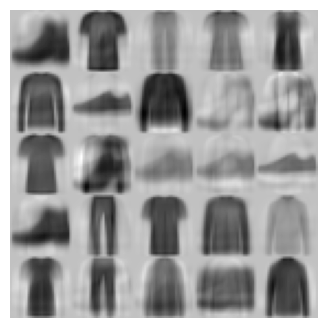

In [49]:
project_into_pcs(percent)